In [72]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from matplotlib import ticker
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

#train_dataset loading
input_paths = []
y = []
base_dir = r"C:\Users\Zver\Desktop\airDraw-main\airDraw-main\numbers"
for f in sorted(os.listdir(base_dir)):
    if f == 'background':
        continue
    dir_path = os.path.join(base_dir, f)
    if os.path.isdir(dir_path):
        for i in sorted(os.listdir(dir_path)):
            input_paths.append(os.path.join(dir_path, i))
            y.append(f)
input_paths, y

(['C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\0.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\1.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\2.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\3.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\4.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\5.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\6.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\7.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\8.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\0\\9.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\1\\0.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\1\\1.png',
  'C:\\Users\\Zver\\Desktop\\airDraw-main\\airDraw-main\\numbers\\1\\10.png'

In [73]:
X = []
for img_path in input_paths:
    img = io.imread(img_path, as_gray = True)
    print(img)
    img = resize(img, (28, 28),
                       anti_aliasing=True)
    X.append(img)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

In [74]:
img = io.imread(r'C:\Users\Zver\Desktop\airDraw-main\airDraw-main\numbers\0\0.png'
, as_gray = True)
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
X_test =  X
X_test = np.expand_dims(X_test, 3)
y_test = y#true values

y_test = to_categorical(y_test, num_classes=10)

In [76]:
#Confusion matrix 
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report

model = load_model('Model1.h5')

class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions = model.predict(X_test)
y_pred = predictions.argmax(1)

y_true = y_test.argmax(1)

CM = confusion_matrix(y_true, y_pred)#y_true-actual,y_pred-predicted values
print(CM)

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

plt.show()

[[10  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  1  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  1]
 [ 0  0  0  0  0  1  9  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  1  1  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.83      1.00      0.91        10
           3       0.90      0.90      0.90        10
           4       1.00      0.90      0.95        10
           5       0.90      0.90      0.90        10
           6       0.90      0.90      0.90        10
           7       0.91      1.00      0.95        10
           8       1.00      0.80      0.89        10
           9       0.91      1.00      0.95        10

    accuracy                           0.93       100
   macro avg       

In [77]:

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

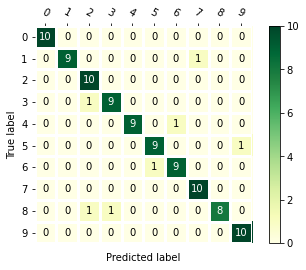

In [78]:
fig, ax = plt.subplots()

im, cbar = heatmap(CM, class_labels, class_labels, ax=ax,
                   cmap="YlGn", cbarlabel="")
texts = annotate_heatmap(im, valfmt="{x:d}")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('Matrica zabune', dpi = 150)
plt.show()